In [1]:
from qiskit import pulse
from qiskit.test.mock import FakeLima

In [2]:
backend = FakeLima()

physical_z_qubit = 0
physical_x_qubit = 1

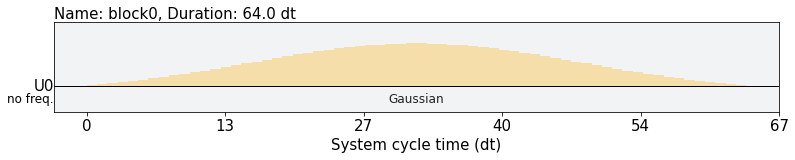

In [3]:
with pulse.build(backend=backend, default_alignment='sequential') as schedule:
    pulse.play(pulse.Gaussian(duration=64, amp=0.5, sigma=16), pulse.control_channels(physical_z_qubit, physical_x_qubit)[0])
    #pulse.measure(qubits=[physical_z_qubit, physical_x_qubit], registers=[pulse.MemorySlot(0), pulse.MemorySlot(1)])
    
schedule.draw()

In [4]:
from qiskit.circuit import Gate

cr_gate = Gate('cr_gaus', 2, [])

In [5]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.append(cr_gate, (0, 1))
circuit.measure_all()

circuit.add_calibration(cr_gate.name, (physical_z_qubit, physical_x_qubit), schedule)

In [6]:
from qiskit import transpile

circuit = transpile(circuit, backend=backend, initial_layout=[physical_z_qubit, physical_x_qubit])

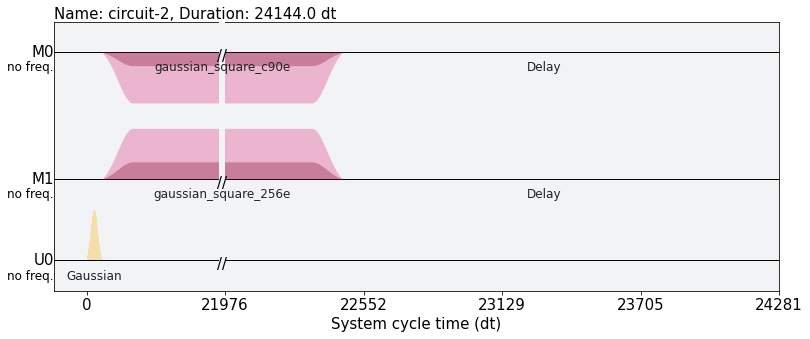

In [7]:
from qiskit import schedule as build_schedule

full_schedule = build_schedule(circuit, backend=backend)
full_schedule.draw()

In [8]:
job = backend.run(full_schedule, shots=1024)

In [9]:
job.result().data()

/usr/local/lib/python3.8/dist-packages/qiskit/providers/aer/pulse/controllers/pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


{'counts': {'0x0': 1022, '0x1': 2},
 'statevector': [[0.5985407344371155, -0.7990917905331674],
  [0.04375961536592812, -0.005019151377493508],
  [0.00010615348115029858, 0.00026976228245042817],
  [-0.017960070667423493, -0.028629093614670968],
  [0.010517916450634658, 0.0027970133528119672],
  [-1.609507787605543e-05, 5.7730526094109647e-05],
  [0.000116928035208212, 3.350710967870675e-05],
  [-1.3487538026738497e-06, 1.6416622838074352e-06],
  [-6.24961542946426e-09, -3.6747574439521387e-09],
  [0.00026587907429094694, 0.0004694494415548751],
  [-0.00012688506543036298, 7.559009361675404e-05],
  [-4.280600755886828e-07, -6.964225082011747e-07],
  [-1.3878902440061072e-06, -2.206327623671734e-06],
  [-1.9209472232729737e-06, -1.2543093037711875e-06],
  [6.944965111944198e-09, -1.0892392094283907e-08],
  [-1.8130494464059212e-08, -1.3927839933866024e-08],
  [-3.427735731894249e-11, 1.3850305407176343e-10],
  [-1.2952152315542588e-12, -1.1976249710394786e-12],
  [-6.6249350762859815e-0